# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
import numpy as np
x_train = np.array(x_train).astype('float32')
x_train = x_train/255
x_test = np.array(x_test).astype('float32')
x_test = x_test/255

In [0]:
y_train_nrm = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_nrm = tf.keras.utils.to_categorical(y_test, num_classes=10)

label for each of the below image: 6
label for each of the below image: 9
label for each of the below image: 9
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 8
label for each of the below image: 3


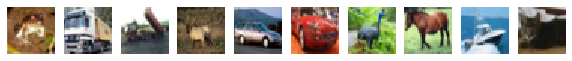

In [6]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train_nrm[0:10][i])))
plt.show()

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',input_shape=(32,32,3)))
#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [12]:
#Train the model
model.fit(x_train,y_train_nrm,      
          validation_data=(x_test,y_test_nrm),
          epochs=10,
          batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 90s 2ms/sample - loss: 1.4594 - accuracy: 0.4746 - val_loss: 1.1723 - val_accuracy: 0.5831
Epoch 2/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.1368 - accuracy: 0.5983 - val_loss: 1.0113 - val_accuracy: 0.6392
Epoch 3/10
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.0023 - accuracy: 0.6467 - val_loss: 1.0084 - val_accuracy: 0.6526
Epoch 4/10
50000/50000 [==============================] - 90s 2ms/sample - loss: 0.9065 - accuracy: 0.6764 - val_loss: 0.9963 - val_accuracy: 0.6515
Epoch 5/10
50000/50000 [==============================] - 90s 2ms/sample - loss: 0.8279 - accuracy: 0.7039 - val_loss: 1.0171 - val_accuracy: 0.6530
Epoch 6/10
50000/50000 [==============================] - 90s 2ms/sample - loss: 0.7705 - accuracy: 0.7246 - val_loss: 0.9606 - val_accuracy: 0.6709
Epoch 7/10
50000/50000 [==============================] 

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

In [14]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [15]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [0]:
path1='/content/Mydrive/My Drive/Great Learning/Residency 8/Day 3/Internal lab/images/images/bird.jpg'
path2='/content/Mydrive/My Drive/Great Learning/Residency 8/Day 3/Internal lab/images/images/butterfly.jpg'
path3='/content/Mydrive/My Drive/Great Learning/Residency 8/Day 3/Internal lab/images/images/cup.jpg'
path4='/content/Mydrive/My Drive/Great Learning/Residency 8/Day 3/Internal lab/images/images/train.jpg'

In [0]:
img1 = tf.keras.preprocessing.image.load_img(path1)
img1 = img1.resize((600,400))
img2 = tf.keras.preprocessing.image.load_img(path2)
img2 = img2.resize((600,400))
img3 = tf.keras.preprocessing.image.load_img(path3)
img3 = img3.resize((600,400))
img4 = tf.keras.preprocessing.image.load_img(path4)
img4 = img4.resize((600,400))

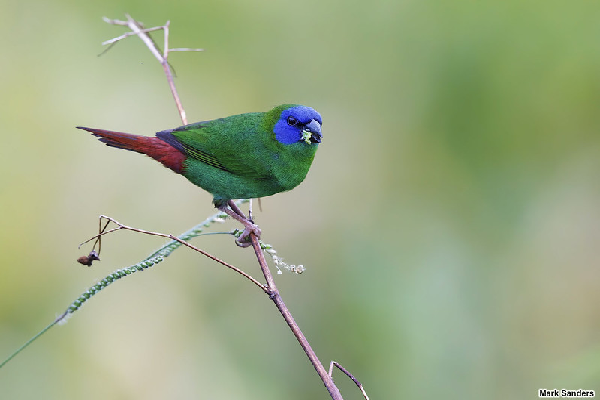

In [57]:
img1

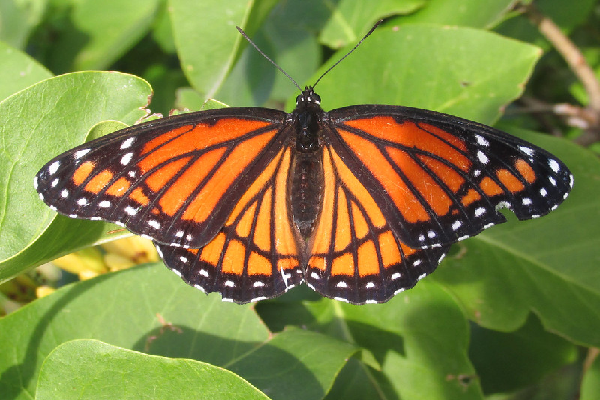

In [58]:
img2

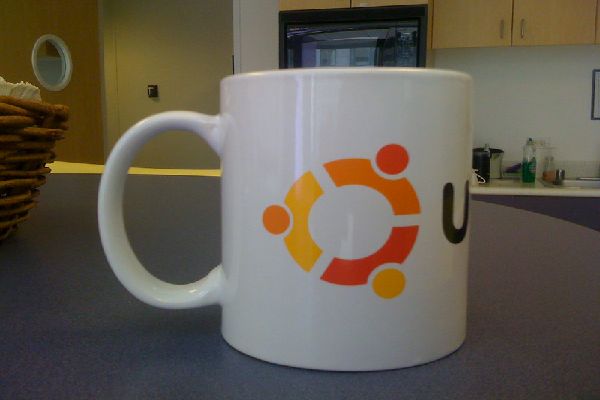

In [59]:
img3

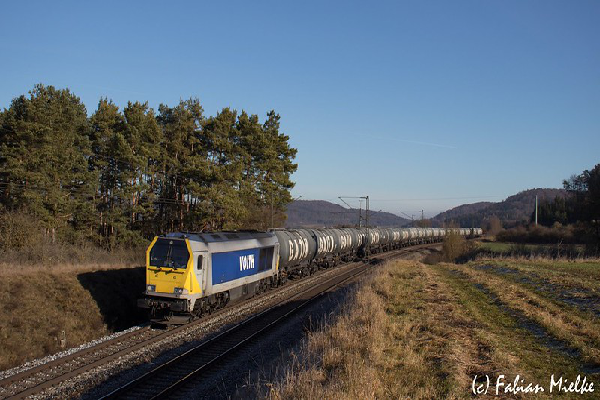

In [60]:
img4

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [61]:
#Prepare Input 
#VGG takes 224x224 image
model_input = img1.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

In [63]:
#Prepare Input 
#VGG takes 224x224 image
model_input1 = img2.resize((224,224))
model_input1 = tf.keras.preprocessing.image.img_to_array(model_input1)

#Image array should be normalized in same way as was done for VGG training
model_input1 = tf.keras.applications.vgg16.preprocess_input(model_input1)

#Add a dimension to input data to make it a 4D input as required by model
model_input1 = np.expand_dims(model_input1, axis=0)
model_input1.shape

(1, 224, 224, 3)

In [64]:
#Prepare Input 
#VGG takes 224x224 image
model_input2 = img3.resize((224,224))
model_input2 = tf.keras.preprocessing.image.img_to_array(model_input2)

#Image array should be normalized in same way as was done for VGG training
model_input2 = tf.keras.applications.vgg16.preprocess_input(model_input2)

#Add a dimension to input data to make it a 4D input as required by model
model_input2 = np.expand_dims(model_input2, axis=0)
model_input2.shape

(1, 224, 224, 3)

In [65]:
#Prepare Input 
#VGG takes 224x224 image
model_input3 = img4.resize((224,224))
model_input3 = tf.keras.preprocessing.image.img_to_array(model_input3)

#Image array should be normalized in same way as was done for VGG training
model_input3 = tf.keras.applications.vgg16.preprocess_input(model_input3)

#Add a dimension to input data to make it a 4D input as required by model
model_input3 = np.expand_dims(model_input3, axis=0)
model_input3.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [66]:
#Predict
prediction1 = vgg.predict(model_input)
prediction1.shape


(1, 1000)

In [69]:
prediction2 = vgg.predict(model_input1)
prediction2.shape

(1, 1000)

In [68]:
prediction3 = vgg.predict(model_input2)
prediction3.shape

(1, 1000)

In [67]:
prediction4 = vgg.predict(model_input3)
prediction4.shape

(1, 1000)

In [21]:
#Prediction Class
np.argmax(prediction1[0])

504

In [70]:
#Prediction Class
np.argmax(prediction2[0])

323

In [71]:
#Prediction Class
np.argmax(prediction3[0])

504

In [72]:
#Prediction Class
np.argmax(prediction4[0])

565

In [76]:
tf.keras.applications.vgg16.decode_predictions(prediction1)

[[('n01833805', 'hummingbird', 0.40052846),
  ('n01828970', 'bee_eater', 0.23913911),
  ('n01537544', 'indigo_bunting', 0.11363034),
  ('n02268853', 'damselfly', 0.044835694),
  ('n02268443', 'dragonfly', 0.038814053)]]

In [77]:
tf.keras.applications.vgg16.decode_predictions(prediction2)

[[('n02279972', 'monarch', 0.99761826),
  ('n02281406', 'sulphur_butterfly', 0.0018099961),
  ('n02264363', 'lacewing', 0.0003677728),
  ('n02281787', 'lycaenid', 0.000108705346),
  ('n02277742', 'ringlet', 9.088009e-05)]]

In [74]:
tf.keras.applications.vgg16.decode_predictions(prediction3)

[[('n03063599', 'coffee_mug', 0.72603714),
  ('n03063689', 'coffeepot', 0.1035238),
  ('n07930864', 'cup', 0.06556606),
  ('n04398044', 'teapot', 0.03476225),
  ('n03950228', 'pitcher', 0.025469208)]]

In [75]:
tf.keras.applications.vgg16.decode_predictions(prediction4)

[[('n03393912', 'freight_car', 0.29296535),
  ('n03160309', 'dam', 0.15731575),
  ('n04467665', 'trailer_truck', 0.10562244),
  ('n03272562', 'electric_locomotive', 0.101980664),
  ('n03496892', 'harvester', 0.09259774)]]

# NLP

## Question 1

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Read file 'tweets.csv'

In [24]:
tweets=pd.read_csv('/content/Mydrive/My Drive/Great Learning/Residency 8/Day 3/Internal lab/tweets.csv',encoding='unicode_escape')
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [25]:
tweets.shape

(9093, 3)

**Drop null values**

*   Drop all the rows with null values




In [26]:
tweets.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [27]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


In [0]:
tweets_f=tweets[tweets['emotion_in_tweet_is_directed_at'].notnull()]

In [29]:
tweets_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3291 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3291 non-null object
dtypes: object(3)
memory usage: 102.8+ KB


**Print the dataframe**
*   print initial 5 rows of the data


In [30]:
tweets_f.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [0]:
tweets_f= tweets_f.applymap(lambda s: s.lower())
tweets_f = tweets_f.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))

tweets_f= tweets_f.applymap(lambda s: s.strip())

In [33]:
tweets_f.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [34]:
pd.value_counts(tweets_f['is_there_an_emotion_directed_at_a_brand_or_product'])

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i cant tell                              9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
options = ['positive emotion','negative emotion'] 
pn_df=tweets_f[tweets_f['is_there_an_emotion_directed_at_a_brand_or_product'].isin(options)]

In [36]:
pd.value_counts(pn_df['is_there_an_emotion_directed_at_a_brand_or_product'])

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [37]:
pn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3191 non-null object
emotion_in_tweet_is_directed_at                       3191 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3191 non-null object
dtypes: object(3)
memory usage: 99.7+ KB


##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
pn_df['is_there_an_emotion_directed_at_a_brand_or_product']=pn_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1,'negative emotion':0})

In [39]:
pn_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,1


In [40]:
pd.value_counts(pn_df['is_there_an_emotion_directed_at_a_brand_or_product'])

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [41]:
X = pn_df.tweet_text
y = pn_df.is_there_an_emotion_directed_at_a_brand_or_product
print(X.shape)
print(y.shape)

(3191,)
(3191,)


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [42]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2,test_size= 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)



In [44]:
# examine the document-term matrix
X_train_dtm

<2393x5259 sparse matrix of type '<class 'numpy.int64'>'
	with 39512 stored elements in Compressed Sparse Row format>

In [45]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<798x5259 sparse matrix of type '<class 'numpy.int64'>'
	with 12034 stored elements in Compressed Sparse Row format>

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [47]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [49]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
# make class predictions for X_test_dtm
y_pred_classL = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
# make class predictions for X_test_dtm
y_pred_classN = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [52]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_classL)

0.8721804511278195

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [53]:
# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_classN)

0.8659147869674185